<a href="https://colab.research.google.com/github/GustavoMiec/Classificador_Avaliacao_pos_ML/blob/main/Classificador_Avaliacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk import tokenize
import seaborn as sns
from string import punctuation
!pip install unidecode
import unidecode

In [80]:
avaliacoes = pd.read_csv('b2w.csv')

In [81]:
avaliacoes.head()

original_index                                        review_text  \
0           11955  Bem macio e felpudo...recomendo.  Preço imbatí...   
1           35478  Produto excepcional!  recomendo!!! inovador e ...   
2          122760  recebi o produto antes do prazo mas veio com d...   
3           17114  Bom custo beneficio. Adequado para pessoas que...   
4           19112  Além de higiênico tem o tamanho ideal. Só falt...   

                               review_text_processed  \
0  bem macio e felpudo...recomendo.  preco imbati...   
1  produto excepcional!  recomendo!!! inovador e ...   
2  recebi o produto antes do prazo mas veio com d...   
3  bom custo beneficio. adequado para pessoas que...   
4  alem de higienico tem o tamanho ideal. so falt...   

                               review_text_tokenized  polarity  rating  \
0  ['bem', 'macio', 'felpudo', 'recomendo', 'prec...       1.0       4   
1  ['produto', 'excepcional', 'recomendo', 'inova...       1.0       5   
2  ['recebi', 'produto', 'antes', 'do', 'prazo', ...       0.0       1   
3  ['bom', 'custo', 'beneficio', 'adequado', 'par...       1.0       5   
4  ['alem', 'de', 'higienico', 'tem', 'tamanho', ...       NaN       3   

   kfold_polarity  kfold_rating  
0               1             1  
1               1             1  
2               1             1  
3               1             1  
4              -1             1

In [82]:
avaliacoes = avaliacoes.drop(["original_index","review_text_processed", "review_text_tokenized","rating", "kfold_polarity","kfold_rating" ], axis= 1)

In [83]:
avaliacoes.head()

review_text  polarity
0  Bem macio e felpudo...recomendo.  Preço imbatí...       1.0
1  Produto excepcional!  recomendo!!! inovador e ...       1.0
2  recebi o produto antes do prazo mas veio com d...       0.0
3  Bom custo beneficio. Adequado para pessoas que...       1.0
4  Além de higiênico tem o tamanho ideal. Só falt...       NaN

In [84]:
avaliacoes.dropna(inplace=True, axis= 0)

In [85]:
avaliacoes

review_text  polarity
0       Bem macio e felpudo...recomendo.  Preço imbatí...       1.0
1       Produto excepcional!  recomendo!!! inovador e ...       1.0
2       recebi o produto antes do prazo mas veio com d...       0.0
3       Bom custo beneficio. Adequado para pessoas que...       1.0
5       ótmo produto atendeu as expectativas, a entreg...       1.0
...                                                   ...       ...
132367  Ótimo jogo, um dos melhores que joguei. Entreg...       1.0
132368  SMARTHPHONE  PERFEITO  MUITO  BOM  E  A  ECONO...       1.0
132369  Eu estou muito chateado com isso gostaria que ...       0.0
132371  O produto anunciado no site dizia ser  100% al...       0.0
132372  Não recebi o produto e consta como entregue no...       0.0

[116058 rows x 2 columns]

In [86]:
avaliacoes.polarity.value_counts()

polarity
1.0    80300
0.0    35758
Name: count, dtype: int64

In [87]:
treino, teste, classe_treino, classe_teste = train_test_split(avaliacoes.review_text, avaliacoes.polarity, stratify=avaliacoes.polarity,  random_state= 42)

In [88]:
# regressao_logistica = LogisticRegression()

# regressao_logistica.fit(treino, classe_treino)
# acuracia = regressao_logistica.score(teste, classe_teste)
# print(f'Acurácia: {acuracia}')

In [89]:
texto = ['Este produro é muito bom', 'Este produto é muito ruim']
vetorizar = CountVectorizer()
bag_of_words = vetorizar.fit_transform(texto)

In [90]:
matriz_espersa = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorizar.get_feature_names_out())

In [91]:
matriz_espersa

bom  este  muito  produro  produto  ruim
0    1     1      1        1        0     0
1    0     1      1        0        1     1

In [92]:
def treinar_modelo(dados, coluna_texto, coluna_sentimento):
  vetorizar = CountVectorizer(max_features= 100)
  bag_of_words = vetorizar.fit_transform(avaliacoes[coluna_texto])

  treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words, avaliacoes[coluna_sentimento], stratify=avaliacoes[coluna_sentimento],  random_state= 42)
  regressao_logistica = LogisticRegression()

  regressao_logistica.fit(treino, classe_treino)
  return regressao_logistica.score(teste, classe_teste)



In [93]:
print(treinar_modelo(avaliacoes, 'review_text', 'polarity'))

0.8881268309495088


In [94]:
todas_avaliacoes = [texto for texto in avaliacoes.review_text]
todas_palavras = ' '.join(todas_avaliacoes)

In [95]:
len(todas_avaliacoes)

116058

In [96]:
nuvem_palavras = WordCloud().generate(todas_palavras)

In [97]:
nuvem_palavras

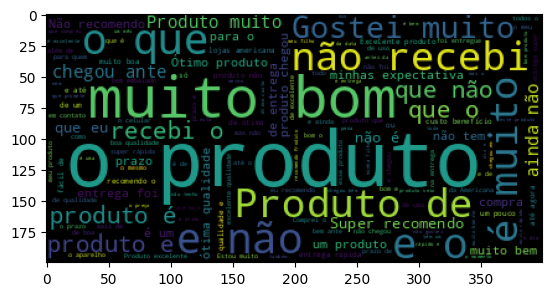

In [98]:
plt.figure()
plt.imshow(nuvem_palavras)
plt.show()

In [99]:
nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110).generate(todas_palavras)

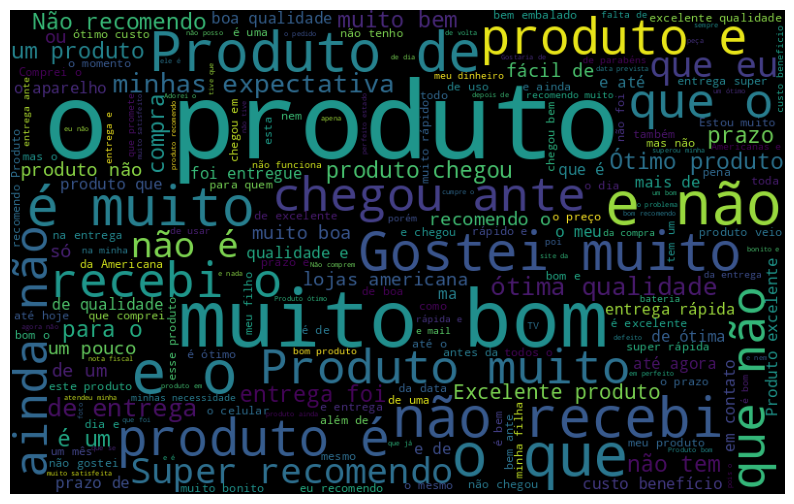

In [100]:
plt.figure(figsize=(10, 7))
plt.imshow(nuvem_palavras)
plt.axis('off')
plt.show()

In [101]:
def wordcloud_cloud_neg(dados, coluna_texto):
  # Use parentheses instead of square brackets for the query method
  texto_negativo = dados.query("polarity == 0")
  todas_avaliacoes = [texto for texto in texto_negativo[coluna_texto]]
  todas_palavras = ' '.join(todas_avaliacoes)
  nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(todas_palavras)

  plt.figure(figsize=(10, 7))
  plt.imshow(nuvem_palavras, interpolation='bilinear')
  plt.axis('off')
  plt.show()


In [102]:
def wordcloud_cloud_pos(dados, coluna_texto):
  # Use parentheses instead of square brackets for the query method
  texto_negativo = dados.query("polarity == 1")
  todas_avaliacoes = [texto for texto in texto_negativo[coluna_texto]]
  todas_palavras = ' '.join(todas_avaliacoes)
  nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(todas_palavras)

  plt.figure(figsize=(10, 7))
  plt.imshow(nuvem_palavras, interpolation='bilinear')
  plt.axis('off')
  plt.show()

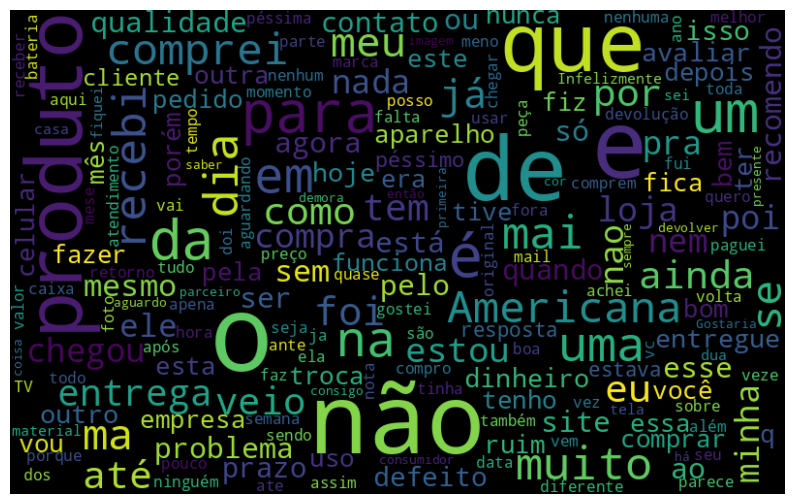

In [103]:
wordcloud_cloud_neg(avaliacoes, 'review_text')

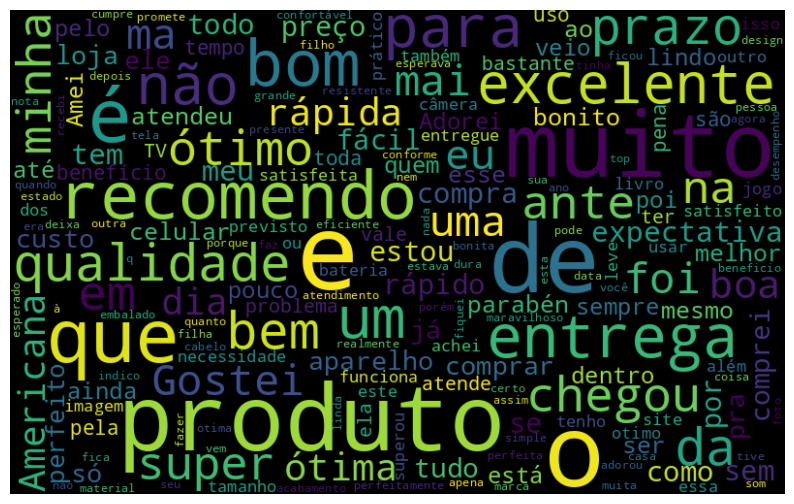

In [104]:
wordcloud_cloud_pos(avaliacoes, 'review_text')

In [105]:
corpus = ["Muito bom este produto", "Muito ruim esse produto"]
frequencia = nltk.FreqDist(corpus)
frequencia

FreqDist({'Muito bom este produto': 1, 'Muito ruim esse produto': 1})

In [106]:
frase = "Muito bom este produto"

token_por_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_por_espaco.tokenize(frase)
token_frase

['Muito', 'bom', 'este', 'produto']

In [107]:
token_por_espaco = tokenize.WhitespaceTokenizer()
token_dataset = token_por_espaco.tokenize(todas_palavras)
frequencia = nltk.FreqDist(token_dataset)
frequencia

FreqDist({'e': 89308, 'o': 76053, 'de': 75791, 'a': 66640, 'que': 53574, 'não': 44253, 'do': 36776, 'muito': 36566, 'é': 36314, 'produto': 34983, ...})

In [108]:
dataframe_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()), "Frequencia": list(frequencia.values())})
dataframe_frequencia.head()

Palavra  Frequencia
0                   Bem         413
1                 macio         216
2                     e       89308
3  felpudo...recomendo.           1
4                 Preço         334

In [109]:
dataframe_frequencia.nlargest(columns="Frequencia", n=10)

Palavra  Frequencia
2         e       89308
20        o       76053
17       de       75791
39        a       66640
50      que       53574
33      não       44253
23       do       36776
43    muito       36566
60        é       36314
21  produto       34983

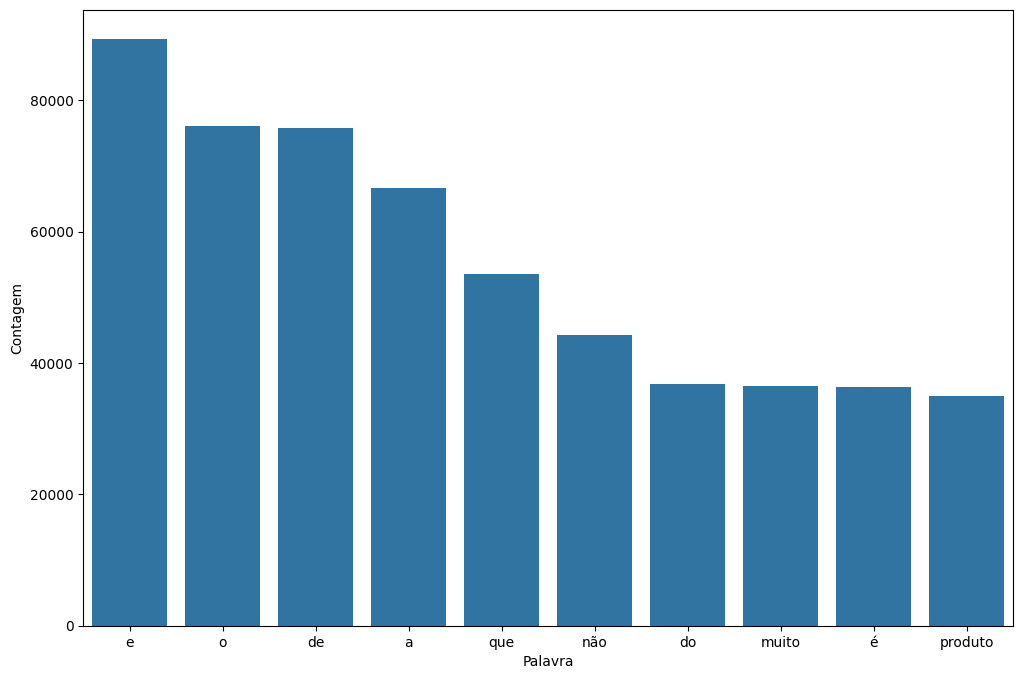

In [110]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(data = dataframe_frequencia.nlargest(columns="Frequencia", n=10), x= "Palavra", y= "Frequencia")
ax.set(ylabel="Contagem")
plt.show()

In [111]:
def grafico(dados, coluna_texto, quantidade):
  todas_palavras = ' '.join([texto for texto in dados[coluna_texto]])
  token_frase = token_por_espaco.tokenize(todas_palavras)
  frequencia = nltk.FreqDist(token_frase)
  dataframe_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()), "Frequencia": list(frequencia.values())})

  data_frequencia = dataframe_frequencia.nlargest(columns="Frequencia", n=quantidade)
  plt.figure(figsize=(12, 8))
  ax = sns.barplot(data = data_frequencia, x= "Palavra", y= "Frequencia")
  ax.set(ylabel="Contagem")
  plt.show()

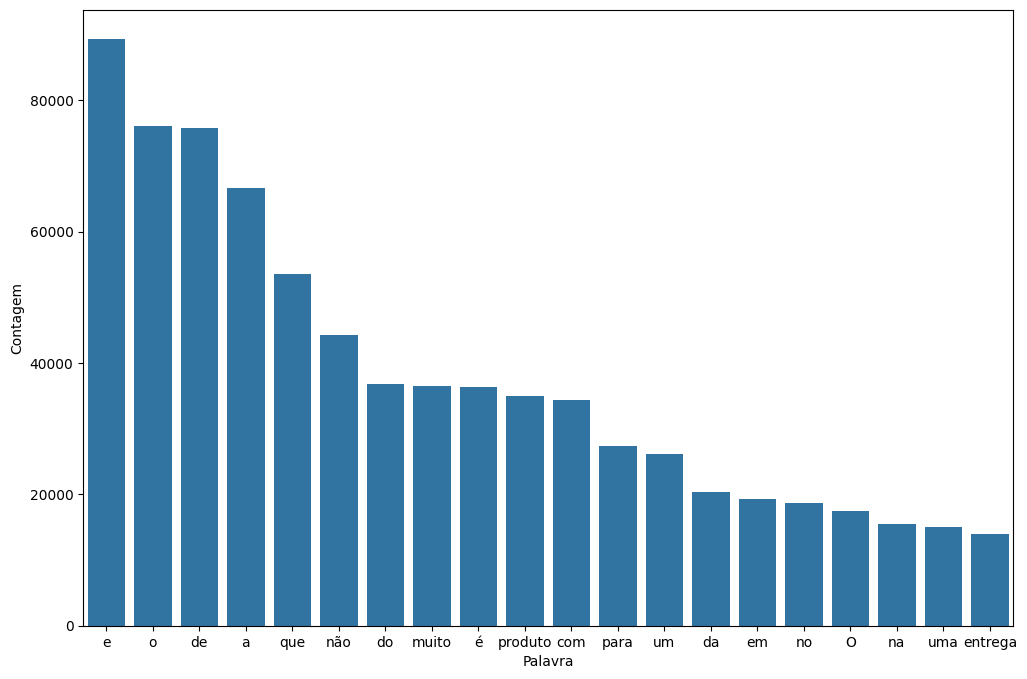

In [112]:
grafico(avaliacoes, 'review_text', 20)

In [113]:
import nltk
nltk.download('stopwords')
palavras_irrelevantes = nltk.corpus.stopwords.words('portuguese')
palavras_irrelevantes

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['a',
 'à',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'às',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'é',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'éramos',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'está',
 'estamos',
 'estão',
 'estar',
 'estas',
 'estava',
 'estavam',
 'estávamos',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estivéramos',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivéssemos',
 'estou',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'fôramos',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fôssemos',
 'fui',
 'há',
 'haja',
 'hajam',
 'hajamos',
 'hão',
 'havemos',
 'haver',
 'hei',
 'houve',
 'houvemos',
 'houver',
 'houvera',
 'houverá',
 'houveram',
 'houvéramos',
 'houverão',
 'houverei',
 'houverem',
 'hou

In [114]:
frase_processada = list()
for avaliacao in avaliacoes.review_text:
  nova_frase = list()
  palavras_texto = token_por_espaco.tokenize(avaliacao)
  for palavra in palavras_texto:
    if palavra not in palavras_irrelevantes:
      nova_frase.append(palavra)
  frase_processada.append(' '.join(nova_frase))

avaliacoes['texto_sem_stopwords'] = frase_processada

In [115]:
avaliacoes.head()

review_text  polarity  \
0  Bem macio e felpudo...recomendo.  Preço imbatí...       1.0   
1  Produto excepcional!  recomendo!!! inovador e ...       1.0   
2  recebi o produto antes do prazo mas veio com d...       0.0   
3  Bom custo beneficio. Adequado para pessoas que...       1.0   
5  ótmo produto atendeu as expectativas, a entreg...       1.0   

                                 texto_sem_stopwords  
0  Bem macio felpudo...recomendo. Preço imbatível...  
1  Produto excepcional! recomendo!!! inovador gos...  
2  recebi produto antes prazo veio defeito trava ...  
3  Bom custo beneficio. Adequado pessoas fazem us...  
5  ótmo produto atendeu expectativas, entrega oco...

In [116]:
treinar_modelo(avaliacao, "texto_sem_stopwords", "polarity")

0.8823022574530416

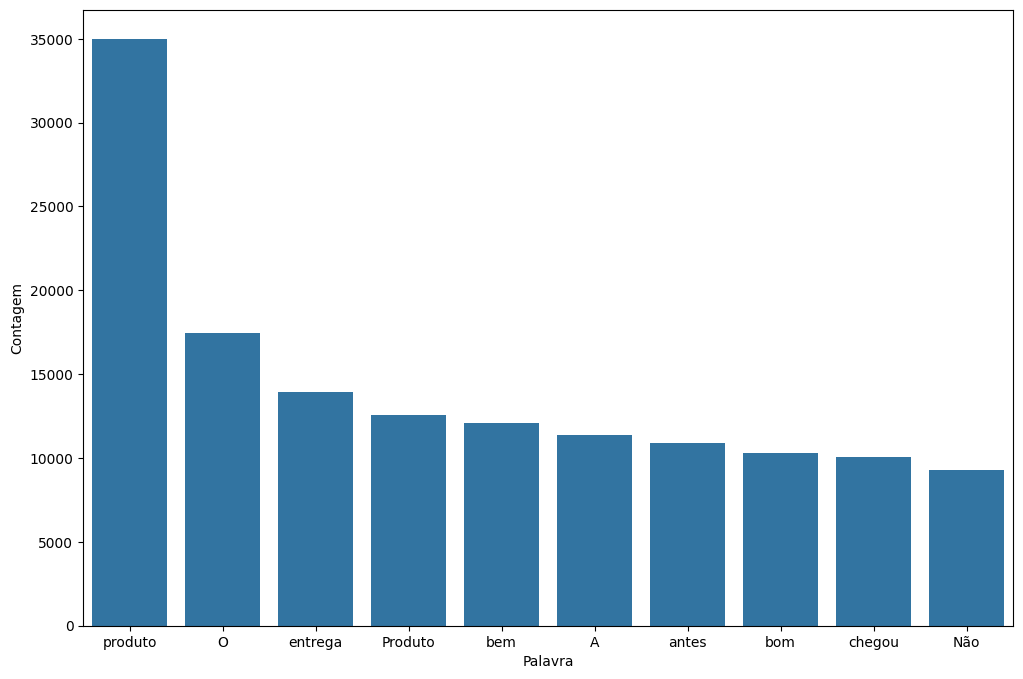

In [117]:
grafico(avaliacoes, "texto_sem_stopwords", 10)

In [118]:
frase = "Muito bom, este produto."

token_pontuacao = tokenize.WordPunctTokenizer()
token_frase = token_pontuacao.tokenize(frase)

token_frase

['Muito', 'bom', ',', 'este', 'produto', '.']

In [119]:
pontuacao = list()
for ponto in punctuation:
  pontuacao.append(ponto)
pontuacao

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [120]:
pontuacao_stopwords = pontuacao + palavras_irrelevantes
pontuacao_stopwords

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~',
 'a',
 'à',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'às',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'é',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'éramos',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'está',
 'estamos',
 'estão',
 'estar',
 'estas',
 'estava',
 'estavam',
 'estávamos',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estivéramos',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivéssemos',
 'estou',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'fôramos',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fôssemos',
 'fui',
 'há',
 'haja

In [121]:
pontuacao_stopwords = pontuacao + palavras_irrelevantes

frase_processada = list()
for avaliacao in avaliacoes.texto_sem_stopwords:
  nova_frase = list()
  palavras_texto = token_pontuacao.tokenize(avaliacao)
  for palavra in palavras_texto:
    if palavra not in pontuacao_stopwords:
      nova_frase.append(palavra)
  frase_processada.append(' '.join(nova_frase))

avaliacoes['texto_sem_stopwords_e_pontuacao'] = frase_processada

In [122]:
avaliacoes.head()

review_text  polarity  \
0  Bem macio e felpudo...recomendo.  Preço imbatí...       1.0   
1  Produto excepcional!  recomendo!!! inovador e ...       1.0   
2  recebi o produto antes do prazo mas veio com d...       0.0   
3  Bom custo beneficio. Adequado para pessoas que...       1.0   
5  ótmo produto atendeu as expectativas, a entreg...       1.0   

                                 texto_sem_stopwords  \
0  Bem macio felpudo...recomendo. Preço imbatível...   
1  Produto excepcional! recomendo!!! inovador gos...   
2  recebi produto antes prazo veio defeito trava ...   
3  Bom custo beneficio. Adequado pessoas fazem us...   
5  ótmo produto atendeu expectativas, entrega oco...   

                     texto_sem_stopwords_e_pontuacao  
0  Bem macio felpudo ... recomendo Preço imbatíve...  
1  Produto excepcional recomendo !!! inovador gos...  
2  recebi produto antes prazo veio defeito trava ...  
3  Bom custo beneficio Adequado pessoas fazem uso...  
5  ótmo produto atendeu expectativas entrega ocor...

In [123]:
avaliacoes.texto_sem_stopwords[5]

'ótmo produto atendeu expectativas, entrega ocorreu antes previsto. bom'

In [124]:
avaliacoes.texto_sem_stopwords_e_pontuacao[5]

'ótmo produto atendeu expectativas entrega ocorreu antes previsto bom'

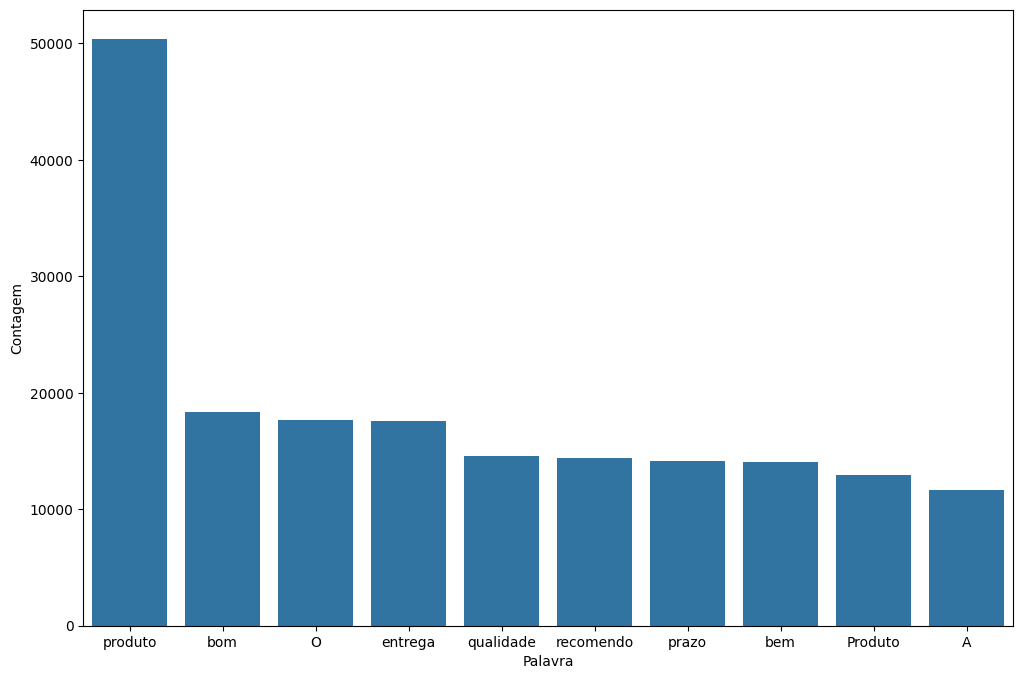

In [125]:
grafico(avaliacoes, "texto_sem_stopwords_e_pontuacao", 10)

In [126]:
acentos = "ótimo péssimo não tão é"

teste = unidecode.unidecode(acentos)
teste

'otimo pessimo nao tao e'

In [127]:
sem_acentos = [unidecode.unidecode(texto) for texto in avaliacoes.texto_sem_stopwords_e_pontuacao]

In [128]:
sem_acentos[4]

'otmo produto atendeu expectativas entrega ocorreu antes previsto bom'

In [150]:
stopwords_sem_acentos = [unidecode.unidecode(texto) for texto in palavras_irrelevantes]
stopwords_sem_acentos

['a',
 'a',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'as',
 'ate',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'e',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'eramos',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'esta',
 'estamos',
 'estao',
 'estar',
 'estas',
 'estava',
 'estavam',
 'estavamos',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estiveramos',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivessemos',
 'estou',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'foramos',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fossemos',
 'fui',
 'ha',
 'haja',
 'hajam',
 'hajamos',
 'hao',
 'havemos',
 'haver',
 'hei',
 'houve',
 'houvemos',
 'houver',
 'houvera',
 'houvera',
 'houveram',
 'houveramos',
 'houverao',
 'houverei',
 'houverem',
 'hou

In [130]:
avaliacoes["texto_sem_stopwords_e_pontuacao_e_acentos"] = sem_acentos

frase_processada = list()
for avaliacao in avaliacoes.texto_sem_stopwords_e_pontuacao_e_acentos:
  nova_frase = list()
  palavras_texto = token_pontuacao.tokenize(avaliacao)
  for palavra in palavras_texto:
    if palavra not in stopwords_sem_acentos:
      nova_frase.append(palavra)
  frase_processada.append(' '.join(nova_frase))

avaliacoes['texto_sem_stopwords_e_pontuacao_e_acentos'] = frase_processada

In [131]:
avaliacoes.head()

review_text  polarity  \
0  Bem macio e felpudo...recomendo.  Preço imbatí...       1.0   
1  Produto excepcional!  recomendo!!! inovador e ...       1.0   
2  recebi o produto antes do prazo mas veio com d...       0.0   
3  Bom custo beneficio. Adequado para pessoas que...       1.0   
5  ótmo produto atendeu as expectativas, a entreg...       1.0   

                                 texto_sem_stopwords  \
0  Bem macio felpudo...recomendo. Preço imbatível...   
1  Produto excepcional! recomendo!!! inovador gos...   
2  recebi produto antes prazo veio defeito trava ...   
3  Bom custo beneficio. Adequado pessoas fazem us...   
5  ótmo produto atendeu expectativas, entrega oco...   

                     texto_sem_stopwords_e_pontuacao  \
0  Bem macio felpudo ... recomendo Preço imbatíve...   
1  Produto excepcional recomendo !!! inovador gos...   
2  recebi produto antes prazo veio defeito trava ...   
3  Bom custo beneficio Adequado pessoas fazem uso...   
5  ótmo produto atendeu expectativas entrega ocor...   

           texto_sem_stopwords_e_pontuacao_e_acentos  
0  Bem macio felpudo ... recomendo Preco imbative...  
1  Produto excepcional recomendo !!! inovador gos...  
2  recebi produto antes prazo veio defeito trava ...  
3  Bom custo beneficio Adequado pessoas fazem uso...  
5  otmo produto atendeu expectativas entrega ocor...

In [132]:
treinar_modelo(avaliacoes, "texto_sem_stopwords_e_pontuacao_e_acentos", "polarity")

0.8829226262278131

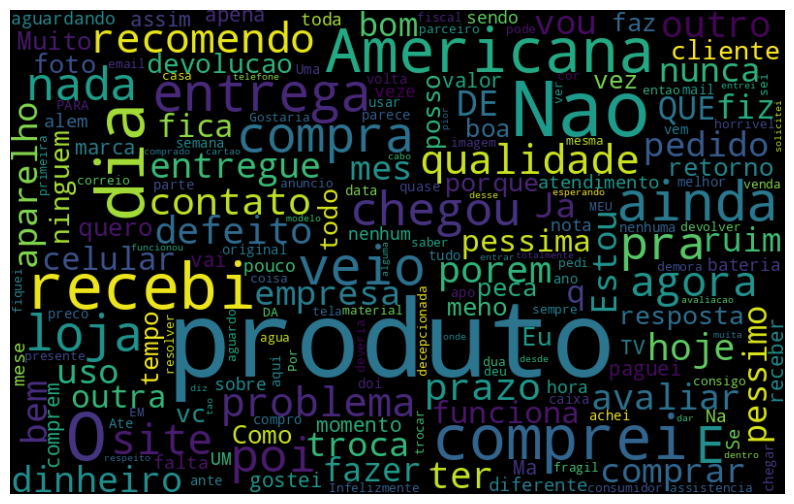

In [133]:
wordcloud_cloud_neg(avaliacoes, "texto_sem_stopwords_e_pontuacao_e_acentos")

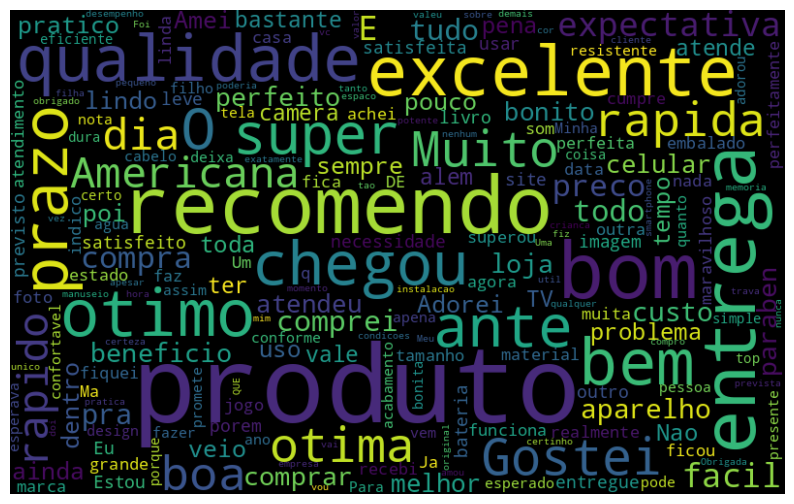

In [134]:
wordcloud_cloud_pos(avaliacoes, "texto_sem_stopwords_e_pontuacao_e_acentos")

In [135]:
frase = "O RAto Roeu A Roupa Do REi de Roma"
print(frase.lower())

o rato roeu a roupa do rei de roma


In [136]:
frase_processada = list()
for avaliacao in avaliacoes.texto_sem_stopwords_e_pontuacao_e_acentos:
  nova_frase = list()
  avaliacao = avaliacao.lower()
  palavras_texto = token_pontuacao.tokenize(avaliacao)
  for palavra in palavras_texto:
    if palavra not in stopwords_sem_acentos:
      nova_frase.append(palavra)
  frase_processada.append(' '.join(nova_frase))

avaliacoes['texto_sem_stopwords_e_pontuacao_e_acentos_minusculo'] = frase_processada

In [137]:
avaliacoes.head()

review_text  polarity  \
0  Bem macio e felpudo...recomendo.  Preço imbatí...       1.0   
1  Produto excepcional!  recomendo!!! inovador e ...       1.0   
2  recebi o produto antes do prazo mas veio com d...       0.0   
3  Bom custo beneficio. Adequado para pessoas que...       1.0   
5  ótmo produto atendeu as expectativas, a entreg...       1.0   

                                 texto_sem_stopwords  \
0  Bem macio felpudo...recomendo. Preço imbatível...   
1  Produto excepcional! recomendo!!! inovador gos...   
2  recebi produto antes prazo veio defeito trava ...   
3  Bom custo beneficio. Adequado pessoas fazem us...   
5  ótmo produto atendeu expectativas, entrega oco...   

                     texto_sem_stopwords_e_pontuacao  \
0  Bem macio felpudo ... recomendo Preço imbatíve...   
1  Produto excepcional recomendo !!! inovador gos...   
2  recebi produto antes prazo veio defeito trava ...   
3  Bom custo beneficio Adequado pessoas fazem uso...   
5  ótmo produto atendeu expectativas entrega ocor...   

           texto_sem_stopwords_e_pontuacao_e_acentos  \
0  Bem macio felpudo ... recomendo Preco imbative...   
1  Produto excepcional recomendo !!! inovador gos...   
2  recebi produto antes prazo veio defeito trava ...   
3  Bom custo beneficio Adequado pessoas fazem uso...   
5  otmo produto atendeu expectativas entrega ocor...   

  texto_sem_stopwords_e_pontuacao_e_acentos_minusculo  
0  bem macio felpudo ... recomendo preco imbative...   
1  produto excepcional recomendo !!! inovador gos...   
2  recebi produto antes prazo veio defeito trava ...   
3  bom custo beneficio adequado pessoas fazem uso...   
5  otmo produto atendeu expectativas entrega ocor...

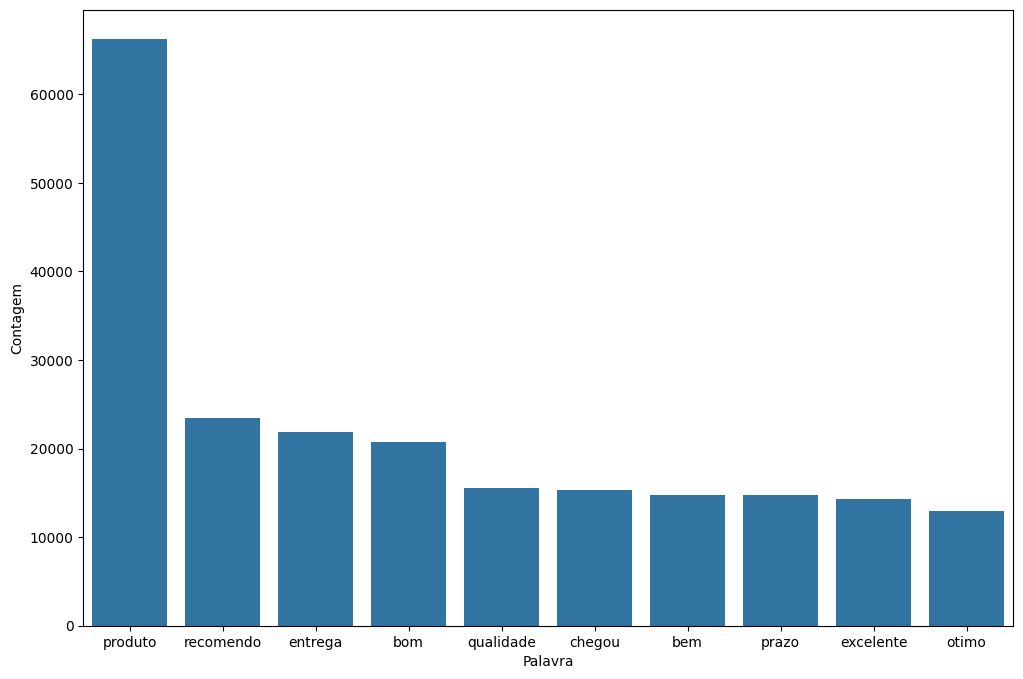

In [138]:
grafico(avaliacoes, "texto_sem_stopwords_e_pontuacao_e_acentos_minusculo", 10)

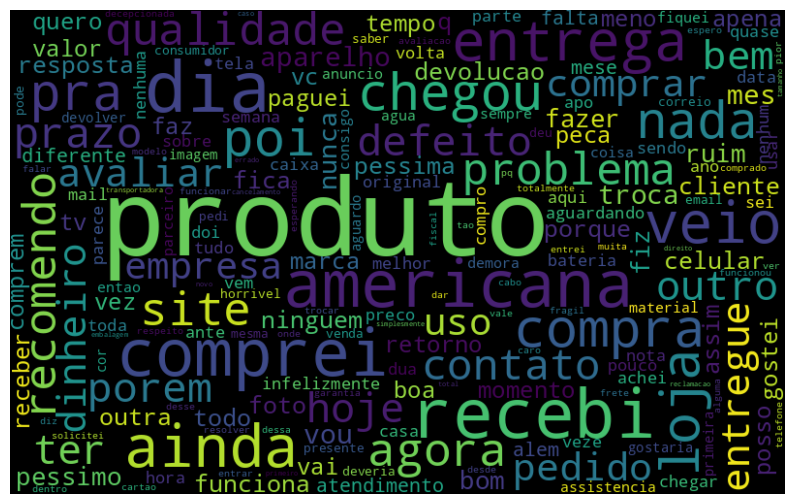

In [139]:
wordcloud_cloud_neg(avaliacoes, "texto_sem_stopwords_e_pontuacao_e_acentos_minusculo")

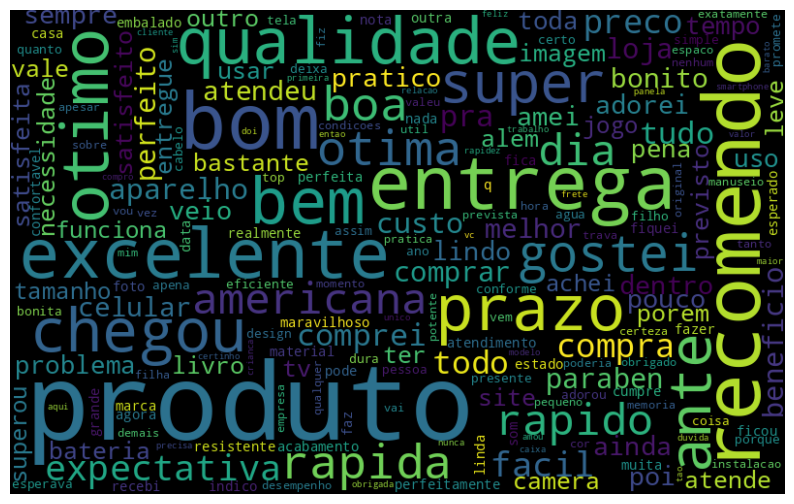

In [140]:
wordcloud_cloud_pos(avaliacoes, "texto_sem_stopwords_e_pontuacao_e_acentos_minusculo")

In [141]:
nltk.download('rslp')
stmmer = nltk.stem.RSLPStemmer()
stmmer.stem("correndo")
stmmer.stem("corrida")
stmmer.stem("corridos")
stmmer.stem("correr")

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


'corr'

In [142]:
frase_processada = list()
for avaliacao in avaliacoes.texto_sem_stopwords_e_pontuacao_e_acentos_minusculo:
  nova_frase = list()
  palavras_texto = token_pontuacao.tokenize(avaliacao)
  for palavra in palavras_texto:
    nova_frase.append(stmmer.stem(palavra))
  frase_processada.append(' '.join(nova_frase))

avaliacoes['texto_stemmizado'] = frase_processada

In [143]:
avaliacoes.head()

review_text  polarity  \
0  Bem macio e felpudo...recomendo.  Preço imbatí...       1.0   
1  Produto excepcional!  recomendo!!! inovador e ...       1.0   
2  recebi o produto antes do prazo mas veio com d...       0.0   
3  Bom custo beneficio. Adequado para pessoas que...       1.0   
5  ótmo produto atendeu as expectativas, a entreg...       1.0   

                                 texto_sem_stopwords  \
0  Bem macio felpudo...recomendo. Preço imbatível...   
1  Produto excepcional! recomendo!!! inovador gos...   
2  recebi produto antes prazo veio defeito trava ...   
3  Bom custo beneficio. Adequado pessoas fazem us...   
5  ótmo produto atendeu expectativas, entrega oco...   

                     texto_sem_stopwords_e_pontuacao  \
0  Bem macio felpudo ... recomendo Preço imbatíve...   
1  Produto excepcional recomendo !!! inovador gos...   
2  recebi produto antes prazo veio defeito trava ...   
3  Bom custo beneficio Adequado pessoas fazem uso...   
5  ótmo produto atendeu expectativas entrega ocor...   

           texto_sem_stopwords_e_pontuacao_e_acentos  \
0  Bem macio felpudo ... recomendo Preco imbative...   
1  Produto excepcional recomendo !!! inovador gos...   
2  recebi produto antes prazo veio defeito trava ...   
3  Bom custo beneficio Adequado pessoas fazem uso...   
5  otmo produto atendeu expectativas entrega ocor...   

  texto_sem_stopwords_e_pontuacao_e_acentos_minusculo  \
0  bem macio felpudo ... recomendo preco imbative...    
1  produto excepcional recomendo !!! inovador gos...    
2  recebi produto antes prazo veio defeito trava ...    
3  bom custo beneficio adequado pessoas fazem uso...    
5  otmo produto atendeu expectativas entrega ocor...    

                                    texto_stemmizado  
0  bem maci felpud ... recom prec imbati entreg r...  
1           produt excepc recom !!! inov gost ler !!  
2  receb produt ant praz vei defeit tr us agor am...  
3  bom cust benefici adequ pesso faz uso cas apar...  
5  otm produt atend expect entreg ocorr ant previ...

In [144]:
treinar_modelo(avaliacoes, "texto_sem_stopwords_e_pontuacao_e_acentos_minusculo", "polarity")

0.8731690504911253

In [145]:
treinar_modelo(avaliacoes, "texto_stemmizado", "polarity")

0.8875753920386007

In [145]:
wordcloud_cloud_neg(avaliacoes, "texto_stemmizado")

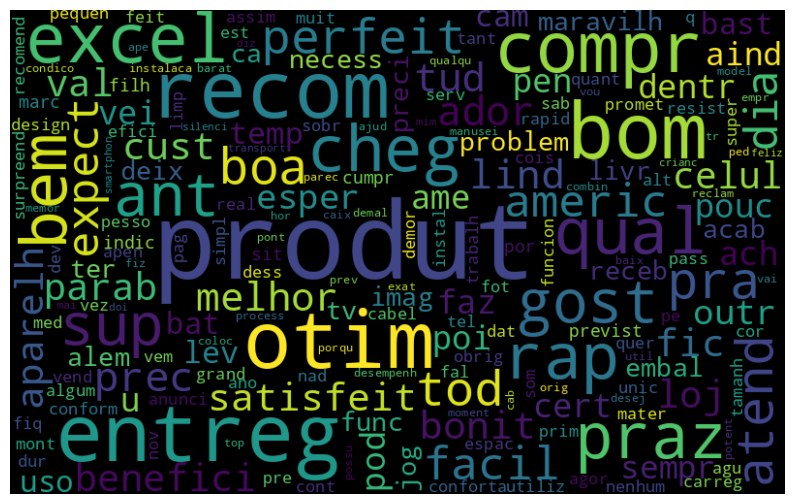

In [146]:
wordcloud_cloud_pos(avaliacoes, "texto_stemmizado")

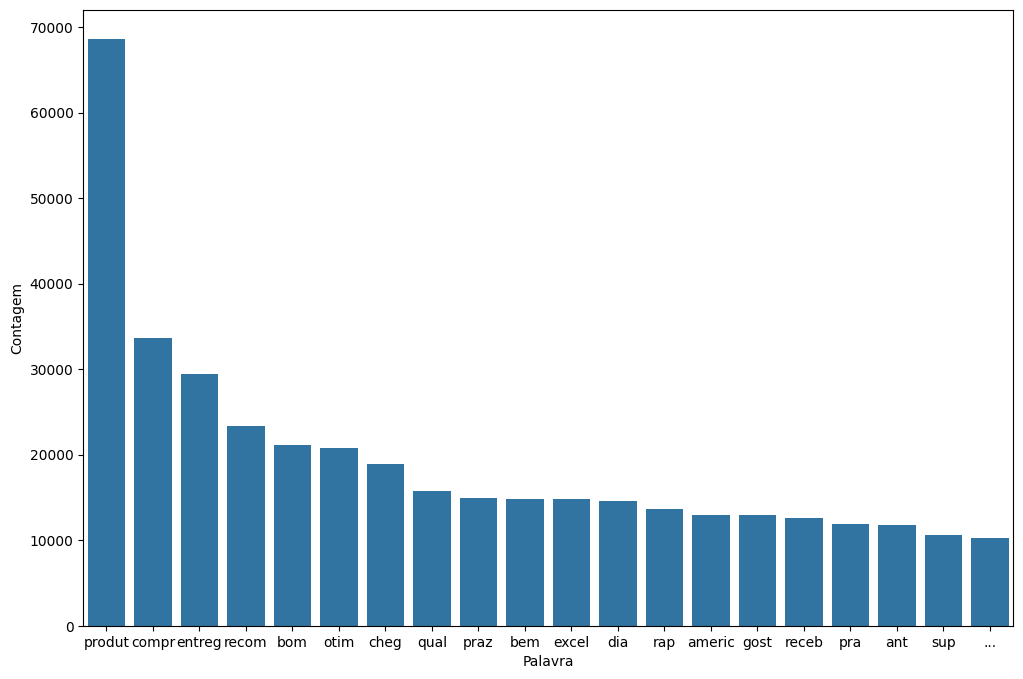

In [151]:
grafico(avaliacoes, "texto_stemmizado", 20)

In [155]:
from sklearn.feature_extraction.text import TfidfVectorizer


frases = ["Este produto é muito bom", "Este produto é muito ruim"]

tfidf = TfidfVectorizer(lowercase=False, max_features=100)
# Call fit_transform on the tfidf object instead of vetorizar
caracteristicas = tfidf.fit_transform(frases)

pd.DataFrame(caracteristicas.todense(), columns=tfidf.get_feature_names_out())

Este       bom     muito   produto      ruim
0  0.448321  0.630099  0.448321  0.448321  0.000000
1  0.448321  0.000000  0.448321  0.448321  0.630099

In [158]:
tfdf_tratados = tfidf.fit_transform(avaliacoes.texto_stemmizado)

treino, teste, classe_treino, classe_teste = train_test_split(tfdf_tratados, avaliacoes.polarity, stratify=avaliacoes.polarity,  random_state= 42)

regressao_logistica = LogisticRegression()

regressao_logistica.fit(treino, classe_treino)
acuracia_tdidf = regressao_logistica.score(teste, classe_teste)
print(f'Acurácia: {acuracia_tdidf}')

Acurácia: 0.8879545062898501


In [161]:
from nltk import ngrams

frase = "Comprei um ótimo produto"
frase_separada = token_por_espaco.tokenize(frase)
pares = ngrams(frase_separada, 2)
list(pares)


[('Comprei', 'um'), ('um', 'ótimo'), ('ótimo', 'produto')]

In [164]:
tdidf = TfidfVectorizer(lowercase=False, ngram_range=(1, 2))
vetor_tfidf = tdidf.fit_transform(avaliacoes.texto_stemmizado)

treino, teste, classe_treino, classe_teste = train_test_split(vetor_tfidf, avaliacoes.polarity, random_state=42)

regressao_logistica = LogisticRegression(max_iter=200)
regressao_logistica.fit(treino, classe_treino)
acuracia_tdidf = regressao_logistica.score(teste, classe_teste)
print(f'Acurácia: {acuracia_tdidf}')


Acurácia: 0.9380665173186283


In [170]:
pesos = pd.DataFrame(
                      regressao_logistica.coef_[0].T,
                      index=tdidf.get_feature_names_out(),
                     )
pesos.nlargest(10, 0)

0
otim       18.510240
excel      16.734029
bom        13.283757
perfeit    11.522877
ador       10.305936
satisfeit   9.054753
rap         8.579458
lind        8.132300
maravilh    7.444708
ame         7.167758

In [168]:
pesos.nsmallest(10, 0)

0
pess      -9.985148
ruim      -8.676983
receb     -7.508547
frac      -7.429009
decepcion -6.878611
horri     -6.717731
dinh      -6.518215
devolv    -6.442554
vei       -6.313315
fragil    -6.268672

In [171]:
pesos.nlargest(100, 0)

0
otim         18.510240
excel        16.734029
bom          13.283757
perfeit      11.522877
ador         10.305936
...                ...
cheg praz     2.190594
ador produt   2.176997
famil         2.159737
bat dur       2.143694
previst       2.141014

[100 rows x 1 columns]